# Clonamos el repositorio para obtener los dataSet

In [1]:
!git clone https://github.com/joanby/machinelearning-az.git

Cloning into 'machinelearning-az'...
remote: Enumerating objects: 10497, done.
remote: Total 10497 (delta 0), reused 0 (delta 0), pack-reused 10497
Receiving objects: 100% (10497/10497), 310.48 MiB | 26.29 MiB/s, done.
Resolving deltas: 100% (213/213), done.
Checking out files: 100% (10250/10250), done.


# Damos acceso a nuestro Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Test it

In [3]:
!ls '/content/drive/My Drive' 

'Building AI Startups.gslides'	     'ingles exam.gdoc'
 Captura.PNG			      Ingles.gdoc
'Colab Notebooks'		     'Inglés IV  38448-104 ma y ju 11.00- 1:00'
 cosineSimilarity.gsheet	     'Jam sin título.gjam'
'Cuadro comparativo.gdoc'	      Letras.gdoc
'Documento sin título (1).gdoc'       Multimedia
'Documento sin título (2).gdoc'      'Practica7 crawler.gdoc'
'Documento sin título.gdoc'	     'Proyecto Final Sharck Dj en mp3.gdoc'
 Estudio			      Reporete.gdoc
'examen de ingles.gdoc'		     'Temas Html a explicar.gdoc'
'frases que no se.gdoc'		      Untitled0.ipynb
'Hoja de cálculo sin título.gsheet'  'zjh-tzyc-atv - 29 abr 2021.gjam'


# Google colab tools

In [4]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Instalar dependendias

In [5]:
!pip install sklearn

# Muestreo Thompson

# Cómo importar las librerías


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [7]:
dataset = pd.read_csv('/content/machinelearning-az/datasets/Part 6 - Reinforcement Learning/Section 33 - Thompson Sampling/Ads_CTR_Optimisation.csv')

# Algoritmo de Muestreo Thompson

In [8]:
import random
N = 10000 #numero usuarios
d = 10 #numero de anuncios
number_of_rewards_1 = [0] * d #arreglo con cantidad de recompensas 1 en n
number_of_rewards_0 = [0] * d #arreglo con cantidad de recompensas 0 en n
ads_selected = [] #anuncios seleccionados por ronda
total_reward = 0 #recompensa total , numero de veces clickeadas en el anuncio
for n in range(0, N):#en cada ronda se muestran los 10 anuncios
    max_random = 0#maxiamo random beta 
    ad = 0#anuncio seleccionado
    for i in range(0, d):#pasamos por los 10 anuncios
        random_beta = random.betavariate(number_of_rewards_1[i]+1, number_of_rewards_0[i]+1)#calcular la beta variante o distribucion probabilistica segun las recompensas 0 y 1
        if random_beta > max_random:#verificamos cual es el valor random beta mas grande y guardamos este , junto al ad
            max_random = random_beta
            ad = i
    ads_selected.append(ad)#guardamos anuncio seleccionado
    reward = dataset.values[n, ad]#guardamos recompensa
    if reward == 1:#actualizamos valor de recompensas 0 y 1
        number_of_rewards_1[ad] = number_of_rewards_1[ad] + 1
    else:
        number_of_rewards_0[ad] = number_of_rewards_0[ad] + 1
    total_reward = total_reward + reward#sumamos total de recompensas 

# Histograma de resultados

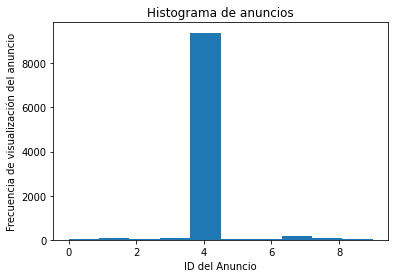

In [9]:
plt.hist(ads_selected)
plt.title("Histograma de anuncios")
plt.xlabel("ID del Anuncio")
plt.ylabel("Frecuencia de visualización del anuncio")
plt.show()